# Answers to ISLR - Chapter 3 - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from itertools import combinations

## Conceptual


***
1. Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.


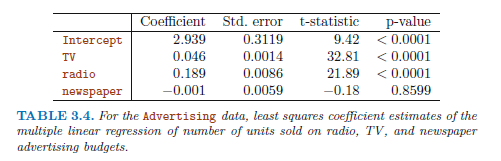

__Answer:__ The null hypotesis says that there is not evidence to prove that there is a correlation btw the predictor X and the response Y. We need to calculate the p-value in order to reject the null hypotesis. Roughly talking, if the p values are higer than 0.1 we can not reject the null-hypo, thus, we cannot reject that there is not stadistical relationship btw X and Y.
It can be seen in the table above that there is strong evidence to reject the null hypotesis btw Sales and TV, and Sales and radio. In other words, there is a significant relation btw those predictors and the response Y (Sales in this case). 
On the other hand, the p-value of newspaper shows that there is a high probability that the relationship btw both is b=0, what means no relationship at all.

***
2. Carefully explain the differences between the KNN classifier and KNN
regression methods.


__Answer__: KKN classifier analize the probability of a class Y=j due to the values of the predictors X=x0. Roughly speaking, the classifier, try to predict which class it's gonna be the prediction, it's a discrete thing. ON the other hand the regression, analyze point by point, which should be the value of Y^ due to the predictors X. KNNCla use bayes proabbility and KKNRe not.

***
3. Suppose we have a data set with five predictors, X1 =GPA, X2 = IQ,
X3 = Gender (1 for Female and 0 forMale), X4 = Interaction between
GPA and IQ, and X5 = Interaction between GPA and Gender. The
response is starting salary after graduation (in thousands of dollars).
Suppose we use least squares to fit the model, and get ˆβ0 = 50, ˆβ1 =
20, ˆβ2 = 0.07, ˆβ3 = 35, ˆβ4 = 0.01, ˆβ5 = −10.
- (a) Which answer is correct, and why?
    - i. For a fixed value of IQ and GPA, males earn more on average
than females.
    - ii. For a fixed value of IQ and GPA, females earn more on
average than males.
    - iii. For a fixed value of IQ and GPA, males earn more on average
than females provided that the GPA is high enough.
    - iv. For a fixed value of IQ and GPA, females earn more on
average than males provided that the GPA is high enough.
- (b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.
- (c) True or false: Since the coefficient for the GPA/IQ interaction
term is very small, there is very little evidence of an interaction
effect. Justify your answer.



__Answer__: 
- (a)
    - I. False - because women earn +35 than males, but males earn +10 btw the combination of GPA and Gender (Men earn more than women when convined higher GPA with them)
    - II True, because same reason as above.
    - III True, if the GPA is high enough to beat that +35, they would earn more than females
    - III False, same reason as above.
    
- (b) Y = 50 + 20*4 + 0.07*110 + 35 + 0.01 * 4 *110 - 10* 4*1 = 137.1
- (c) False, we cannot infer that there is enough evidence to prove that there is not significant interaction btw both coeficients due to they absolute value. To do that, we should perform a method like t-statistic or F-stadistic, to discover the p-value and then make a conclusion about the interaction btw both predictors and the response.

***
4. I collect a set of data (n = 100 observations) containing a single
predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. Y =
β0 + β1X + β2X2 + β3X3 + e.
- (a) Suppose that the true relationship between X and Y is linear,
i.e. Y = β0 + β1X + e. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.
- (b) Answer (a) using test rather than training RSS.
- (c) Suppose that the true relationship between X and Y is not linear,
but we don’t know how far it is from linear. Consider the training
RSS for the linear regression, and also the training RSS for the
cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not
enough information to tell? Justify your answer.
- (d) Answer (c) using test rather than training RSS.

__Answer:__ I am not sure, but in my opinion both would be the same or similar because cubic relationship the model could consider b2 and b3 close to zero to apporach to the true linear relationship btw X and Y. But in case that b2 and b3 cannot be zero then the cubic will have worst RSS (higher).



In case of (c) when the relationship is not linear I would think that the cubic relationship has better results of RSS than the linear one, same when we analyze the test RSS.

***
5. Consider the fitted values that result from performing linear regression
without an intercept. In this setting, the ith fitted value takes
the form


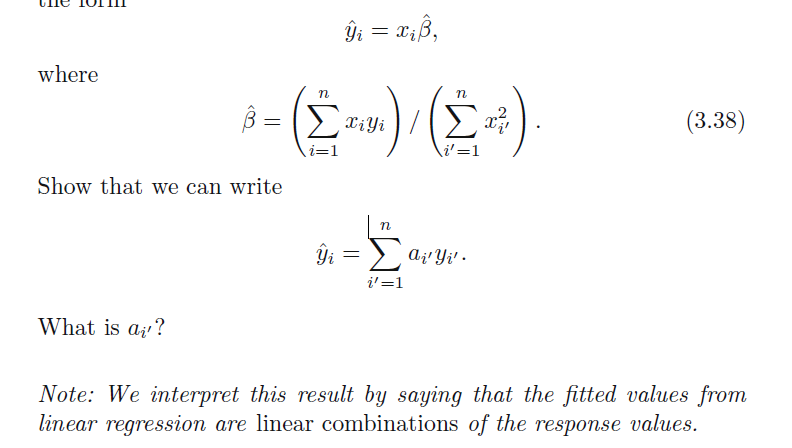

***
6. Using (3.4), argue that in the case of simple linear regression, the
least squares line always passes through the point (¯x, ¯y).


***
7. It is claimed in the text that in the case of simple linear regression
of Y onto X, the R2 statistic (3.17) is equal to the square of the
correlation between X and Y (3.18). Prove that this is the case. For
simplicity, you may assume that ¯x = ¯y = 0.

## Applied

***
8. This question involves the use of simple linear regression on the Auto
data set.
- (a) Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output.
For example:
    - i. Is there a relationship between the predictor and the response?
    - ii. How strong is the relationship between the predictor and
the response?
    - iii. Is the relationship between the predictor and the response
positive or negative?
    - iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95% confidence and prediction
intervals?
- (b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.
- (c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

In [3]:
auto  = pd.read_csv('./data/auto.csv')

In [4]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
X = auto.horsepower.values
y = auto.mpg

In [6]:
X = X.reshape(-1,1)
# Need to reshape to use Linear Regression en Scikit learn

In [7]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [9]:
score = lr.score(X,y)
print('R^2 : {}' .format(score))
print('Slope (b1): ', lr.coef_)
print('Intercept (b0): ', lr.intercept_)

R^2 : 0.6059482578894348
Slope (b1):  [-0.15784473]
Intercept (b0):  39.93586102117047


I Look for a package that is perfect for this


In [10]:
results = smf.ols('mpg ~ horsepower', data=auto).fit()

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        08:15:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Yes there is, the p-value is small enogh to get that conclusion.

ii. It's really strong (low p-value and high F-statistic)

iii. It's negative, that means more horsepower the cars have, less milles per gallon (as it's expected)



In [43]:
# iii.
results.conf_int()

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


This means, that there is a probability of 95% that the true values of b0 and b1 are in the intervals (38.5-41.34) and (-0.17,-0.14) respectively

In [12]:
# With sklearn
print('Sklearn: ',lr.predict(np.array(98).reshape(-1,1)))

# with result
print('Stats method: ',results.params['Intercept'] + results.params['horsepower']*98)

Sklearn:  [24.46707715]
Stats method:  24.467077152512424


In [13]:
results.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

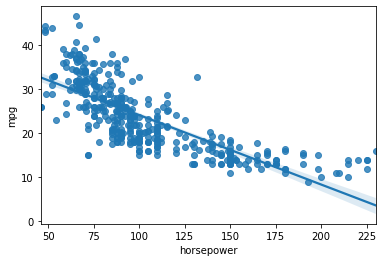

In [16]:
# c.
sns.regplot(x=auto.horsepower,y=auto.mpg)
plt.show()

x = np.linspace(50,225,100)
reg=lr.intercept_ + x*lr.coef_[0]b

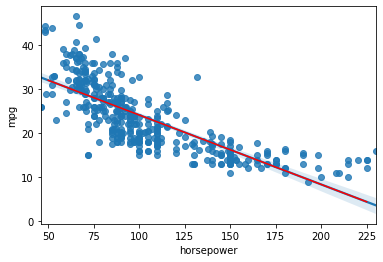

In [23]:
# Same graph but with other function ( I wanted to corroborate that both lines are the same!)
sns.regplot(x=auto.horsepower,y=auto.mpg)
plt.plot(x,reg,color='red')
plt.show()

We can see that at large values of horsepower the predictions underestimate the mpg 

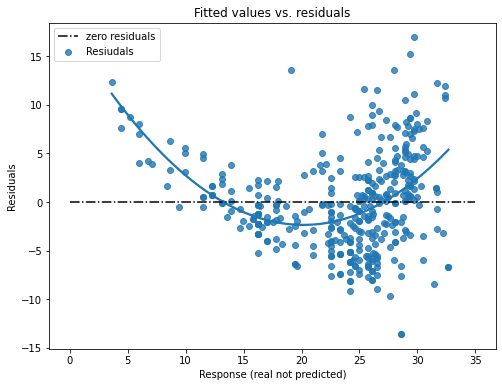

In [84]:
# d
plt.figure(figsize=(8,6))
sns.regplot(x=results.fittedvalues, y=results.resid,order=2,ci=None,label='Resiudals')
plt.plot(np.linspace(0,35,10),np.linspace(0,35,10)*0,ls='-.',c='black',label='zero residuals')
plt.title('Fitted values vs. residuals')
plt.legend()
plt.xlabel('Response (real not predicted)')
plt.ylabel('Residuals')
plt.show()

We can see a kind of pattern in this graph, what makes us infer that the true relationship btw horsepower and mpg is NOT linear at all, as well as there are some outliers in this sample

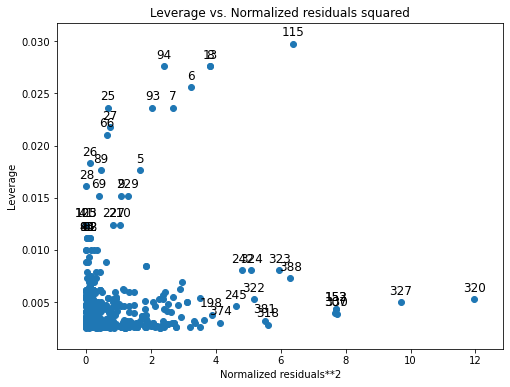

In [76]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

It can be seen in this graph that there are some leverage points in our sample, what can make our regression line not proper enogh for this data. In case that I would like to explore I would consider elimminate those values.

***
9. This question involves the use of multiple linear regression on the
Auto data set.
- (a) Produce a scatterplot matrix which includes all of the variables
in the data set.
- (b) Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable,
cor()
which is qualitative.
- (c) Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance:
    - i. Is there a relationship between the predictors and the response?
    - ii. Which predictors appear to have a statistically significant
relationship to the response?
    - iii. What does the coefficient for the year variable suggest?
- (d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?
- (e) Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?
- (f) Try a few different transformations of the variables, such as
log(X),
√
X, X2. Comment on your findings.

In [4]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


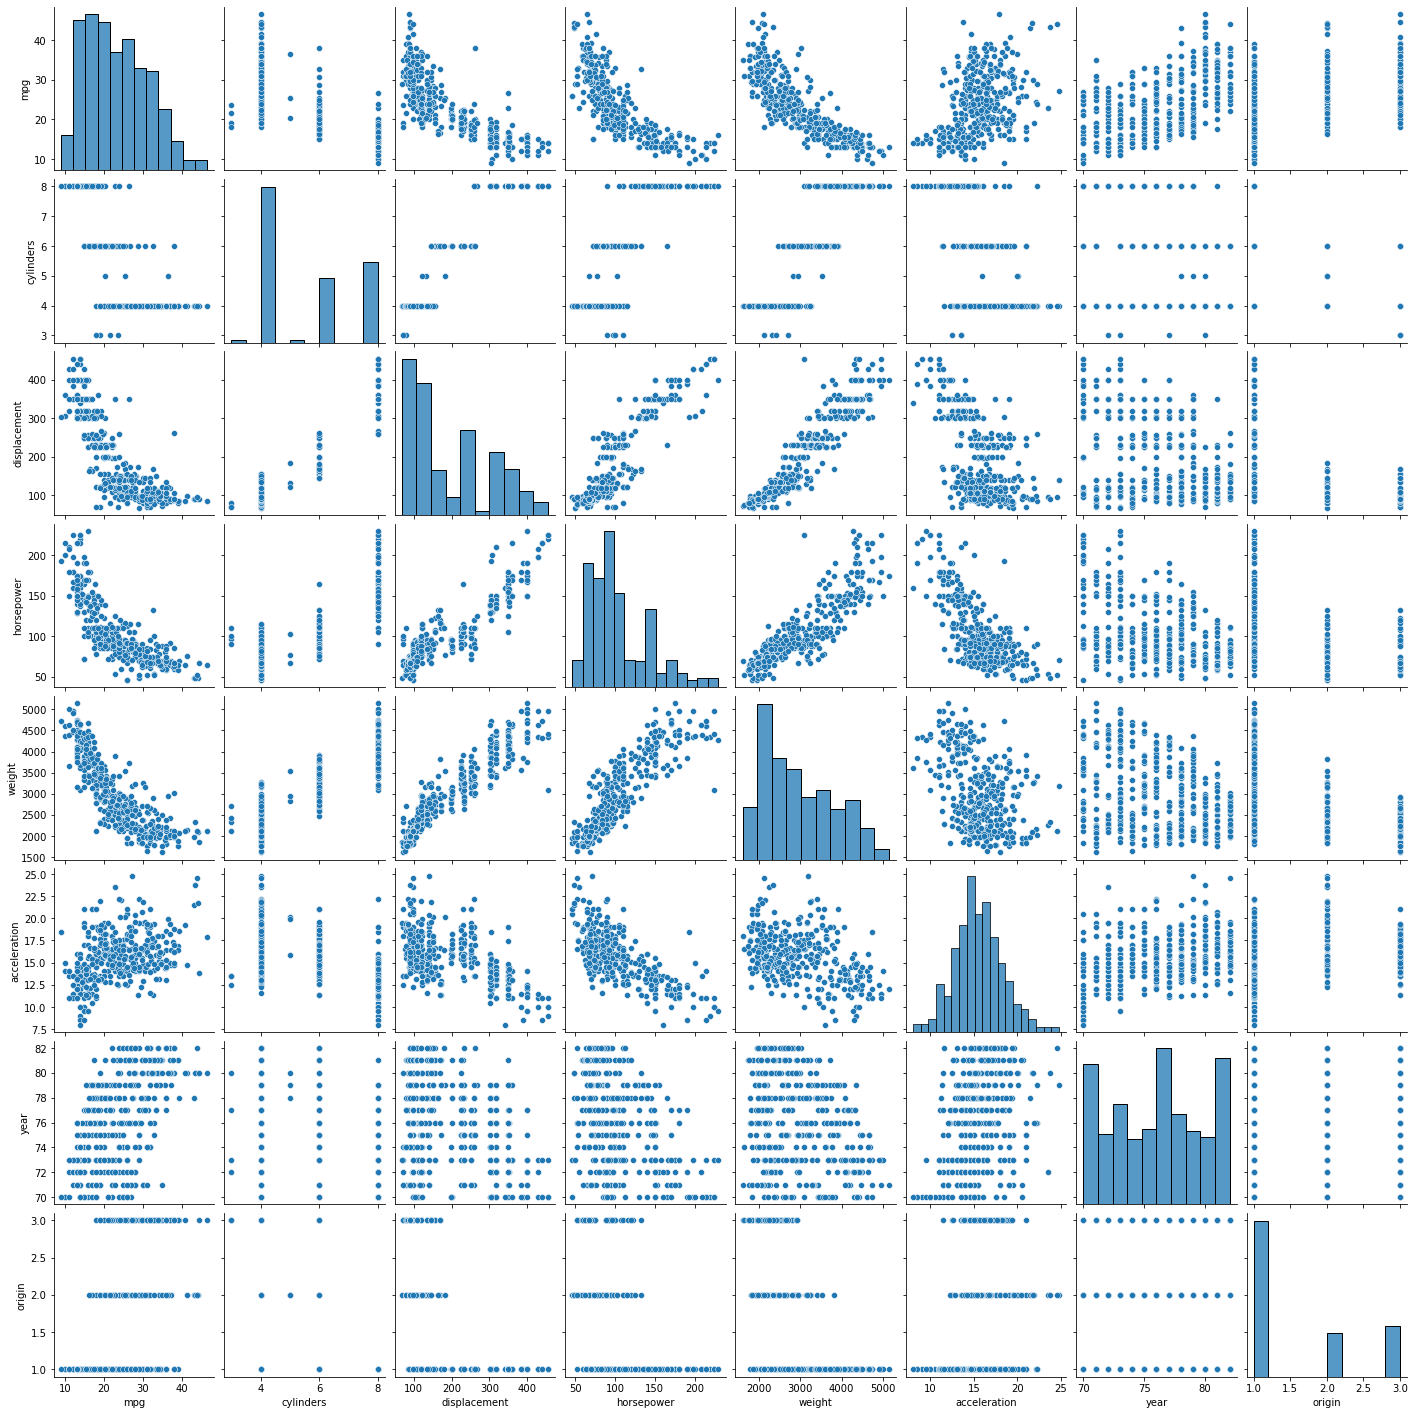

In [4]:
# a)
sns.pairplot(auto)

We already study this plot in chapter 2

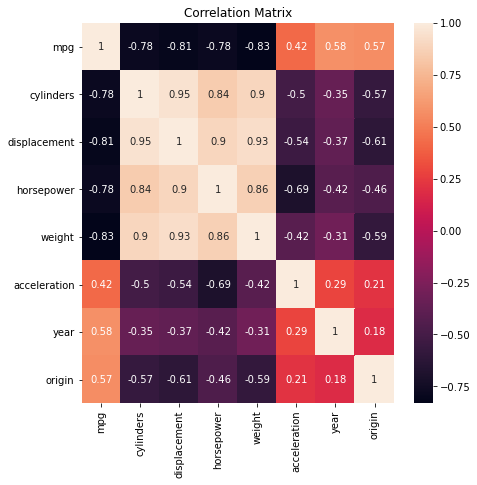

In [12]:
# b)
corr_matrix = auto.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

It can be seen in the graph that are high correlation btw  cyliders displacement horsepower and weight. It's seems that could be a colinearity problem btw those predictors

In [22]:
# d) With sklearn

X = auto.drop(['name','mpg'],axis=1)
y= auto.mpg

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [23]:
score = lr.score(X,y)
print('R^2 : {}' .format(score))
print('Slope (bn): ', lr.coef_)
print('Intercept (b0): ', lr.intercept_)

R^2 : 0.8214780764810597
Slope (bn):  [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
Intercept (b0):  -17.21843462201755


In [25]:
results = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',data=auto).fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        09:18:42   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. It can be seen that there are a correlation btw the response and the predictors because the F-statistic is high. But the question is if all of them has correlation with the response. To answer that qtn we need to see the p-values, and those indicate that there is a problem with horsepower and acceleration! Also as it is expected there are a multicolinearity problem in the analysis. This was analized wiht the correlation matrix, and now there is some information with the 'condition number'

ii. The predictors with significant relationship with the response are: displacement, weight, year and origin

iii. It suggest that each new model (yearly) add 0.75 mpg to the car model. Newer cars bring better fuel consume.-

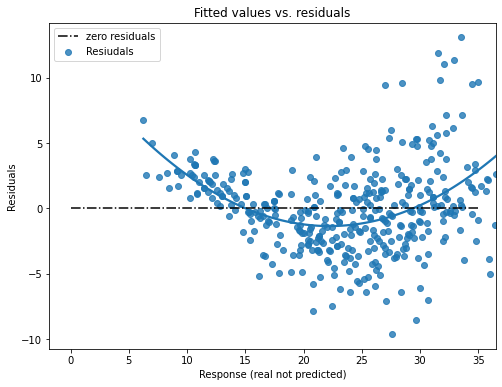

In [27]:
plt.figure(figsize=(8,6))
sns.regplot(x=results.fittedvalues, y=results.resid,order=2,ci=None,label='Resiudals')
plt.plot(np.linspace(0,35,10),np.linspace(0,35,10)*0,ls='-.',c='black',label='zero residuals')
plt.title('Fitted values vs. residuals')
plt.legend()
plt.xlabel('Response (real not predicted)')
plt.ylabel('Residuals')
plt.show()

It can bee seen in this graph that there are a patron in the residuals, what infers that the model is not linear, or there are other problem with the predictores, as well as there are some outliers at high values of the response.

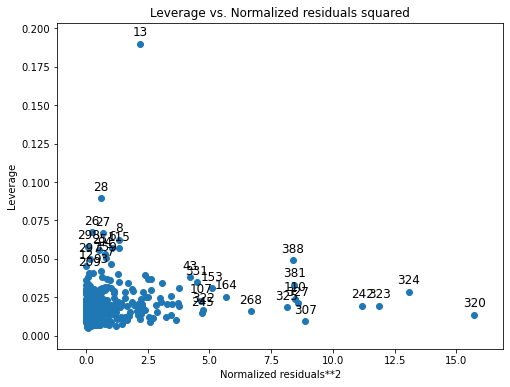

In [28]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

There is one values that has a high leverage value (n.13) the rest of the values are in range, expect the values 320 and 324 that are consider outliers.

In [56]:
# e.
reg_string = ' + '.join(comb[0] + ' * ' + comb[1] for comb in combinations(auto.drop(['name','mpg'],axis=1).columns,2))

reg_string

'cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [59]:
formula = 'mpg' + ' ~ ' + ' + '.join(auto.drop(['name','mpg'],axis=1).columns) + ' + '+ reg_string 
formula

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [60]:
results_comb = smf.ols(formula,data=auto).fit()
results_comb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          4.01e-155
Time:                        09:01:10   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In this new model, there are some interactions that are significant for the model like: acceleration:origin or displacement:year (p-value less than 0.05). Also, some of the original predictors has less significance to the model due to it's not possible to reject the null-hypotesis. Besides that, the model still has multicolinearity problems.

In [76]:
# f
X_log = np.log(auto.drop(['name','mpg'],axis=1)).join(auto.mpg)
X_sqrt = np.sqrt(auto.drop(['name','mpg'],axis=1)).join(auto.mpg)
X_2 = np.power(auto.drop(['name','mpg'],axis=1),2).join(auto.mpg)

In [75]:
X_log

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg
0,2.079442,5.726848,4.867534,8.161660,2.484907,4.248495,0.000000,18.0
1,2.079442,5.857933,5.105945,8.214194,2.442347,4.248495,0.000000,15.0
2,2.079442,5.762051,5.010635,8.142063,2.397895,4.248495,0.000000,18.0
3,2.079442,5.717028,5.010635,8.141190,2.484907,4.248495,0.000000,16.0
4,2.079442,5.710427,4.941642,8.145840,2.351375,4.248495,0.000000,17.0
...,...,...,...,...,...,...,...,...
387,1.386294,4.941642,4.454347,7.933797,2.747271,4.406719,0.000000,27.0
388,1.386294,4.574711,3.951244,7.663877,3.202746,4.406719,0.693147,44.0
389,1.386294,4.905275,4.430817,7.738488,2.451005,4.406719,0.000000,32.0
390,1.386294,4.787492,4.369448,7.872836,2.923162,4.406719,0.000000,28.0


In [79]:
results_log = smf.ols('mpg ~ ' + ' + '.join(auto.drop(['name','mpg'],axis=1).columns),data=X_log).fit()
results_sqrt = smf.ols('mpg ~ ' + ' + '.join(auto.drop(['name','mpg'],axis=1).columns),data=X_sqrt).fit()
results_2 = smf.ols('mpg ~ ' + ' + '.join(auto.drop(['name','mpg'],axis=1).columns),data=X_2).fit()

In [80]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          6.67e-153
Time:                        09:16:42   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -66.5643     17.505     -3.803      0.000    -100.982     -32.146
cylinders        1.4818      1.659      0.893      0.372      -1.780       4.743
displacement    -1.0551      1.538     -0.686      0.493      -4.080       1.970
horsepower      -6.9657      1.557     -4.474      0.000     -10.027      -3.905
weight         -12.5728      2.225     -5.650      0.000     -16.948      -8.198
acceleration    -4.9831      1.608     -3.099      0.002      -8.144      -1.822
year            54.9857      3.555     15.465      0.000      47.995      61.976
origin           1.5822      0.508      3.113      0.002       0.583       2.582
==============================================================================
Omnibus:                       40.670   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.138
Skew:                           0.587   Prob(JB):                     2.40e-18
Kurtosis:                       4.894   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this case (applying log to all predictors) we achieve a better result than the original one (without interaction) and also we solve some part of the multicolinearity (not all of it). Also all the variables could reject the null-hypo except cylinders and displacement.

In [81]:
results_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.17e-145
Time:                        09:19:06   Log-Likelihood:                -1009.4
No. Observations:                 392   AIC:                             2035.
Df Residuals:                     384   BIC:                             2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -49.7981      9.178     -5.426      0.000     -67.844     -31.752
cylinders       -0.2370      1.538     -0.154      0.878      -3.260       2.786
displacement     0.2258      0.229      0.984      0.326      -0.225       0.677
horsepower      -0.7798      0.308     -2.533      0.012      -1.385      -0.174
weight          -0.6217      0.079     -7.872      0.000      -0.777      -0.466
acceleration    -0.8253      0.834     -0.989      0.323      -2.466       0.815
year            12.7903      0.859     14.891      0.000      11.102      14.479
origin           3.2604      0.768      4.247      0.000       1.751       4.770
==============================================================================
Omnibus:                       40.498   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.517
Skew:                           0.608   Prob(JB):                     4.00e-17
Kurtosis:                       4.773   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This performance is slighly worse than the previous one, also it is more similar than the original one.


In [82]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          3.57e-129
Time:                        09:20:15   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2080      2.356      0.513      0.608      -3.424       5.840
cylinders       -0.0883      0.025     -3.502      0.001      -0.138      -0.039
displacement   5.68e-05   1.38e-05      4.109      0.000    2.96e-05     8.4e-05
horsepower   -3.621e-05   4.98e-05     -0.728      0.467      -0.000    6.16e-05
weight       -9.351e-07   8.98e-08    -10.416      0.000   -1.11e-06   -7.59e-07
acceleration     0.0063      0.003      2.334      0.020       0.001       0.012
year             0.0050      0.000     14.160      0.000       0.004       0.006
origin           0.4129      0.069      5.971      0.000       0.277       0.549
==============================================================================
Omnibus:                       21.204   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.337
Skew:                           0.431   Prob(JB):                     4.26e-07
Kurtosis:                       4.027   Cond. No.                     1.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

That's the worst performance (r2 = 0.798) and a high value of the condition number, what means high colinearity.

In [89]:
# Extra try

results_new = smf.ols(formula,data=X_log).fit()
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          5.00e-155
Time:                        09:27:13   Log-Likelihood:                -929.96
No. Observations:                 392   AIC:                             1918.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -802.1497   1064.336     -0.754      0.452   -2895.188    1290.888
cylinders                    34.2918    169.336      0.203      0.840    -298.711     367.294
displacement               -244.4069    145.578     -1.679      0.094    -530.690      41.876
horsepower                  523.0065    144.632      3.616      0.000     238.584     807.429
weight                      -60.0068    217.664     -0.276      0.783    -488.047     368.033
acceleration                 47.8018    166.454      0.287      0.774    -279.534     375.137
year                        170.1908    219.440      0.776      0.439    -261.342     601.723
origin                     -104.8478     54.203     -1.934      0.054    -211.438       1.743
cylinders:displacement       -7.5744      7.125     -1.063      0.288     -21.587       6.438
cylinders:horsepower          8.4946     16.128      0.527      0.599     -23.221      40.210
cylinders:weight              4.3608     17.150      0.254      0.799     -29.365      38.086
cylinders:acceleration       25.8745     15.327      1.688      0.092      -4.267      56.016
cylinders:year              -32.3204     35.059     -0.922      0.357    -101.264      36.623
cylinders:origin              0.5687      4.348      0.131      0.896      -7.981       9.118
displacement:horsepower      -0.7915      9.759     -0.081      0.935     -19.983      18.400
displacement:weight          15.7414      8.762      1.797      0.073      -1.489      32.972
displacement:acceleration    -7.0904     11.679     -0.607      0.544     -30.057      15.876
displacement:year            35.1701     31.736      1.108      0.269     -27.239      97.579
displacement:origin           5.5539      4.827      1.151      0.251      -3.939      15.047
horsepower:weight           -18.5862      9.232     -2.013      0.045     -36.740      -0.432
horsepower:acceleration      -3.5186      5.608     -0.627      0.531     -14.548       7.510
horsepower:year             -87.7856     31.355     -2.800      0.005    -149.446     -26.125
horsepower:origin            -5.2847      5.011     -1.055      0.292     -15.139       4.570
weight:acceleration         -10.2308     11.671     -0.877      0.381     -33.181      12.720
weight:year                  16.4968     46.649      0.354      0.724     -75.239     108.233
weight:origin                 3.7732      7.823      0.482      0.630     -11.611      19.158
acceleration:year             8.7833     33.676      0.261      0.794     -57.442      75.009
acceleration:origin           7.3301      5.248      1.397      0.163      -2.991      17.651
year:origin                  12.0308     11.205      1.074      0.284     -10.005      34.066
===========================================================================

That's a good example of overfitting - R2 is good, but I infer that is following the noise of the sample

***
10. This question should be answered using the Carseats data set.
- (a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.
- (b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!
- (c) Write out the model in equation form, being careful to handle
the qualitative variables properly.
- (d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?
- (e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.
- (f) How well do the models in (a) and (e) fit the data?
- (g) Using the model from (e), obtain 95% confidence intervals for
the coefficient(s).
- (h) Is there evidence of outliers or high leverage observations in the
model from (e)?

In [91]:
carseats = pd.read_csv('./data/carseats.csv')

In [92]:
carseats


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [93]:
# a)
results = smf.ols('Sales ~ Price + Urban + US',data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        10:35:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b)
- b0 (intercept) if the price is 0 and the values of US and Urban are NO, that's the amount of sales expected0
- b1: When the place of the sample is urban, the sales decrease -0.02, but because the p-value is high, we can not conclude that there are statistical relationship btw Urban and sales
- b2: When the place of the sample is in the US the sales increase 1.2006.
- b3. when the price increase the sales decrease. that coef is -0.0545.

c)

Sales ~= 13.043 - 0.0219 * Urban + 1.2006 * US - 0.0545 * Price 

Urban/US (Yes = 1 , No = 0)

d)

For Urban because the p value is higher than 0.05

In [94]:
# e)
results_2 = smf.ols('Sales ~ Price + US',data=carseats).fit()
results_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        10:46:04   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f) They both perform bad. The R2 is 0.239 in both cases

g) The intervals are b0: [11.79 14.271], b1: [0.692 - 1.708], b2:[-0.065 - -0.044]

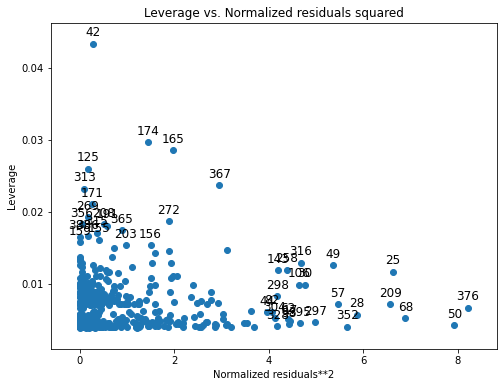

In [95]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results_2, ax = ax)

h ) Yes, there are a big amount of ouliners, ando some values have a high Leverage

***
11. In this problem we will investigate the t-statistic for the null hypothesis
H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.
    - set.seed (1)
    - x=rnorm (100)
    - y=2*x+rnorm (100)
- (a) Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate ˆβ, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the command lm(y∼x+0).)
- (b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.
- (c) What is the relationship between the results obtained in (a) and
(b)?
- (d) For the regression of Y onto X without an intercept, the tstatistic
for H0 : β = 0 takes the form ˆβ/SE( ˆ β), where ˆ β is
given by (3.38), and where

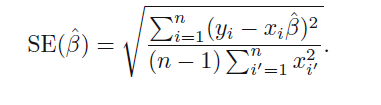

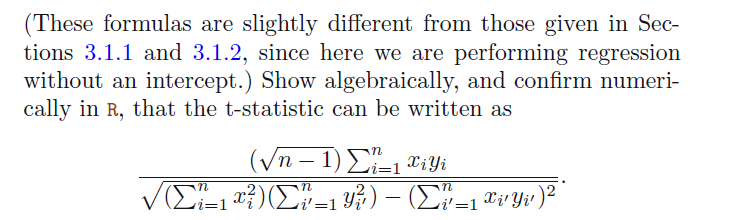

- (e) Using the results from (d), argue that the t-statistic for the regression
of y onto x is the same as the t-statistic for the regression
of x onto y.
- (f) In R, show that when regression is performed with an intercept,
the t-statistic for H0 : β1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y.

In [145]:
np.random.seed(1)
x= np.random.randn(100)
y = 2*x + np.random.rand(100)

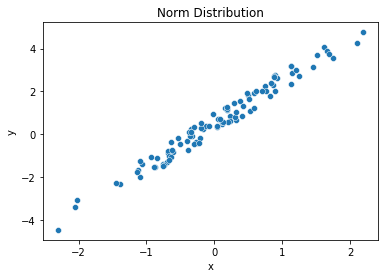

In [146]:
sns.scatterplot(x=x,y=y)
plt.title('Norm Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [128]:
y=pd.DataFrame(y)
df= pd.DataFrame(x)
df.columns=['x']
y.columns=['y']
df= df.join(y)

In [132]:
results = smf.ols('y ~ x + 0',data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              937.0
Date:                Sat, 10 Apr 2021   Prob (F-statistic):                    2.81e-52
Time:                        11:07:48   Log-Likelihood:                         -88.850
No. Observations:                 100   AIC:                                      179.7
Df Residuals:                      99   BIC:                                      182.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.0401      0.067     30.611      0.000       1.908       2.172
==============================================================================
Omnibus:                       41.602   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.519
Skew:                          -0.062   Prob(JB):                       0.0384
Kurtosis:                       1.755   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef is 2.0401 with SE = 0.067, t=30.611 and p-value=0.000 - All this information mean that there is correlation btw the response y and the predictor x.

In [138]:
results = smf.ols('x ~ y + 0',data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              937.0
Date:                Sat, 10 Apr 2021   Prob (F-statistic):                    2.81e-52
Time:                        11:14:10   Log-Likelihood:                         -12.528
No. Observations:                 100   AIC:                                      27.06
Df Residuals:                      99   BIC:                                      29.66
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.4433      0.014     30.611      0.000       0.415       0.472
==============================================================================
Omnibus:                        0.377   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.539
Skew:                           0.102   Prob(JB):                        0.764
Kurtosis:                       2.704   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef is 0.4433 with SE = 0.014, t=30.611 and p-value=0.000 - All this information mean that there is correlation btw the response y and the predictor x.



c) The relationship is that both models has the same t-statistic value for the parameter b0 as well as the same D=F-statistic

In [141]:
results = smf.ols('y ~ x',data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3305.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.62e-77
Time:                        11:21:21   Log-Likelihood:                -23.157
No. Observations:                 100   AIC:                             50.31
Df Residuals:                      98   BIC:                             55.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5043      0.031     16.328      0.000       0.443       0.566
x              2.0013      0.035     57.493      0.000       1.932       2.070
==============================================================================
Omnibus:                       52.939   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.016
Skew:                          -0.055   Prob(JB):                       0.0300
Kurtosis:                       1.707   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
results = smf.ols('x ~ y',data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3305.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.62e-77
Time:                        11:21:35   Log-Likelihood:                 47.684
No. Observations:                 100   AIC:                            -91.37
Df Residuals:                      98   BIC:                            -86.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2430      0.016    -15.125      0.000      -0.275      -0.211
y              0.4853      0.008     57.493      0.000       0.469       0.502
==============================================================================
Omnibus:                       32.590   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.002
Skew:                           0.066   Prob(JB):                       0.0497
Kurtosis:                       1.807   Cond. No.                         2.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be seen in the tables, that the t-statistic for the parameter related with the predictors are the same in both models.
Also the F-stadistic are the same in both models.

***
12. This problem involves simple linear regression without an intercept.
- (a) Recall that the coefficient estimate ˆ β for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?
- (b) Generate an example in R with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is different
from the coefficient estimate for the regression of Y onto X.
- (c) Generate an example in R with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X.

***
13. In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use set.seed(1) prior to
starting part (a) to ensure consistent results.
- (a) Using the rnorm() function, create a vector, x, containing 100
observations drawn from a N(0, 1) distribution. This represents
a feature, X.
(b) Using the rnorm() function, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution i.e. a normal
distribution with mean zero and variance 0.25.
- (c) Using x and eps, generate a vector y according to the model
Y = −1 + 0.5X + e. (3.39)
What is the length of the vector y? What are the values of β0
and β1 in this linear model?
((d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.
- (e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do ˆ β0 and ˆ β1 compare to β0 and
β1?
- (f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() command to create an appropriate legend.
- (g) Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.
- (h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
e in (b). Describe your results.
- (i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term e in (b). Describe your results.
- (j) What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

***
14. This problem focuses on the collinearity problem.
- (a) Perform the following commands in R:
    - set .seed (1)
    - x1=runif (100)
    - x2 =0.5* x1+rnorm (100) /10
    - y=2+2* x1 +0.3* x2+rnorm (100)
The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?
- (b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.
- (c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are ˆ β0, ˆ β1, and
ˆ β2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?
- (d) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?
- (e) Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?
- (f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.
- (g) Now suppose we obtain one additional observation, which was
unfortunately mismeasured.
    - x1=c(x1 , 0.1)
    - x2=c(x2 , 0.8)
    - y=c(y,6)
Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

***
15. This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.
- (a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.
- (b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?
- (c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.
- (d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + e.

In [2]:
boston = pd.read_csv('./data/boston.csv')

In [3]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [17]:
res = {}
re={}
for col in boston.columns:
    results = smf.ols('crim ~'+col,data=boston).fit()
    re[col] = results
    res[col] = results.summary()

In [11]:
res

{'crim': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   crim   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 1.564e+33
 Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
 Time:                        09:37:49   Log-Likelihood:                 15957.
 No. Observations:                 506   AIC:                        -3.191e+04
 Df Residuals:                     504   BIC:                        -3.190e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

In all of them are a relationship except chas with a p-value of 0.2. However R2 is really low for most of the models. So even if the p value is really small, the fact that the r2 is close to zero, do not allow us to say that there is a real reltionship btw the variable and the response.

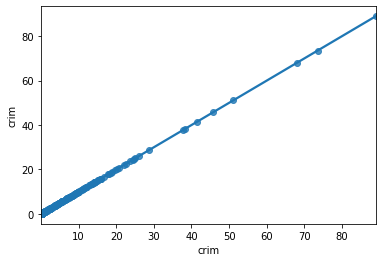

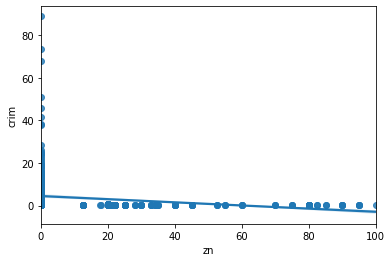

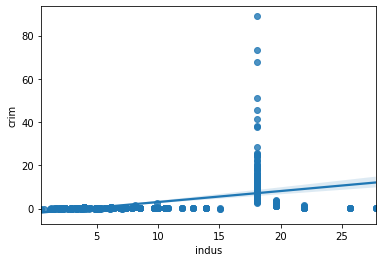

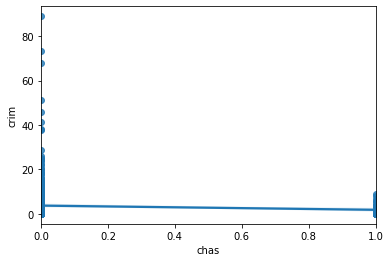

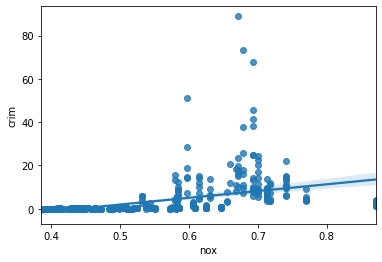

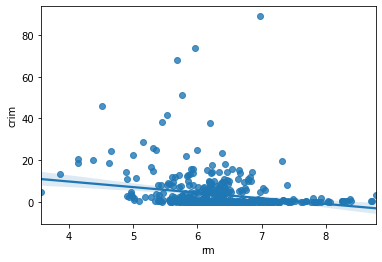

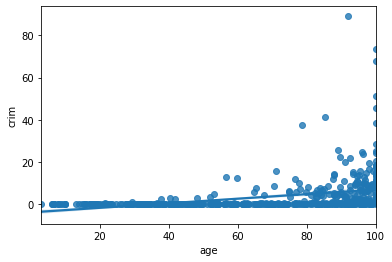

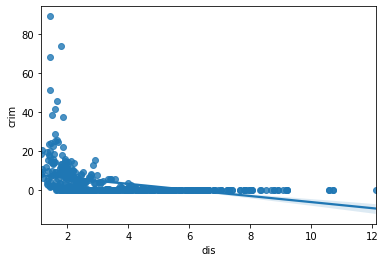

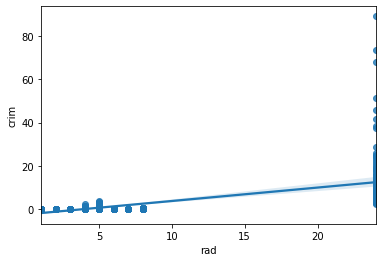

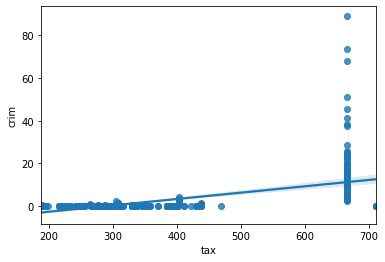

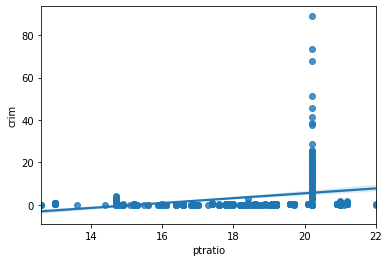

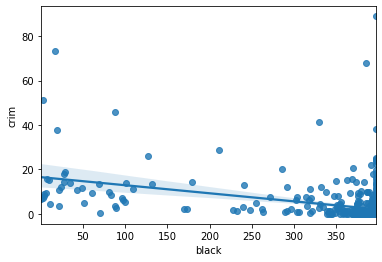

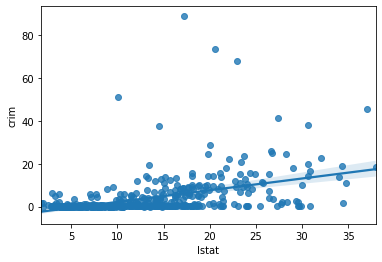

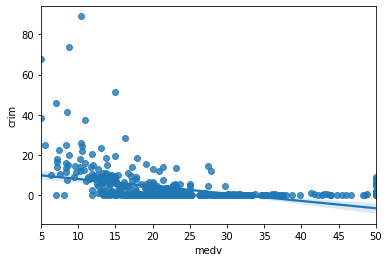

In [14]:
for col in boston.columns:
    sns.regplot(x=col,y='crim',data=boston)
    plt.show()

It can be seen, that most of the variables have not a linear relationship with the resposnse.

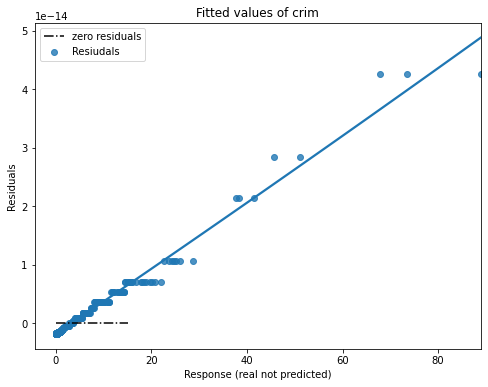

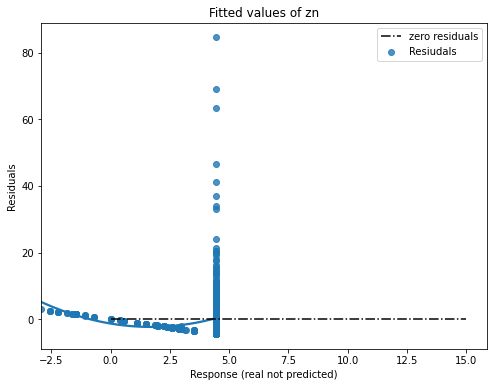

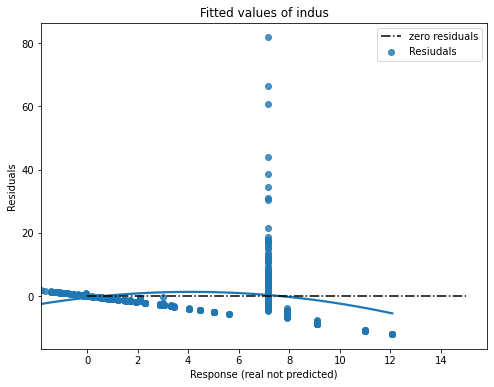

C:\Users\leo_f\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


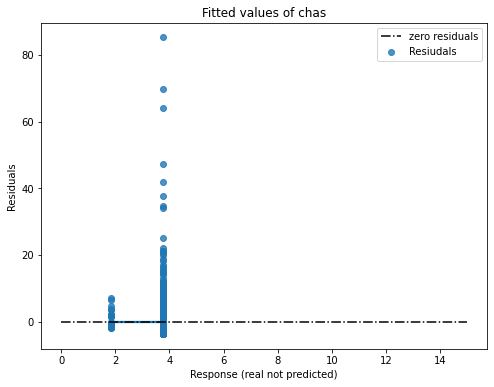

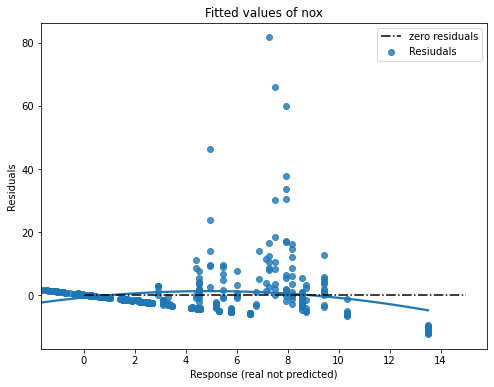

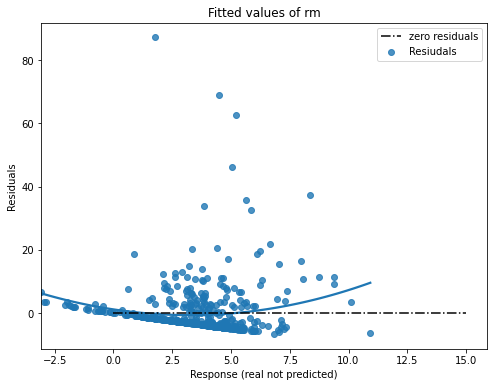

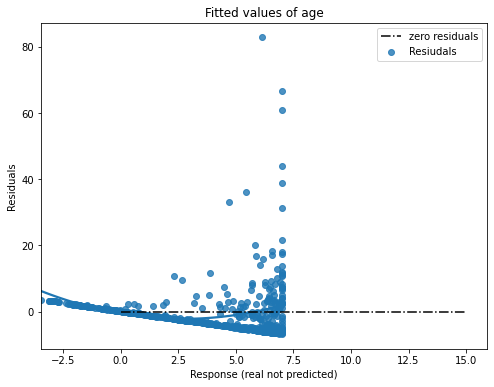

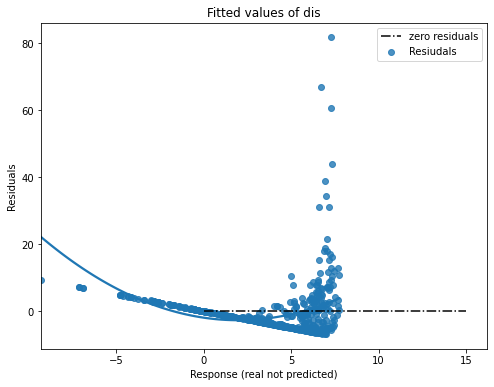

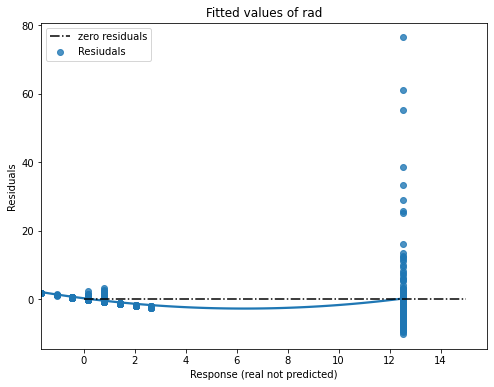

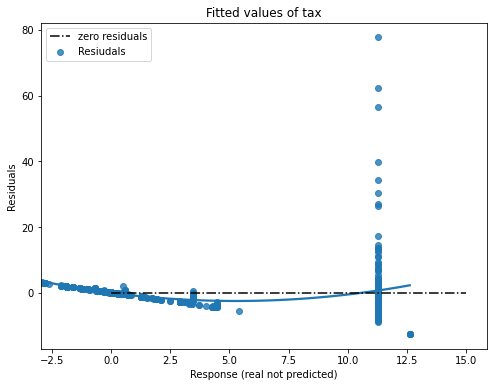

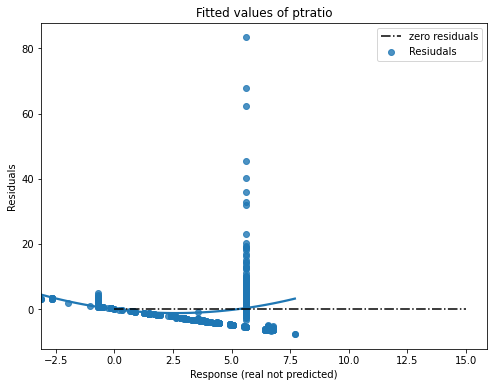

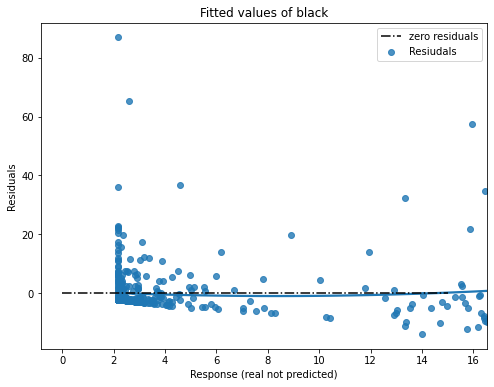

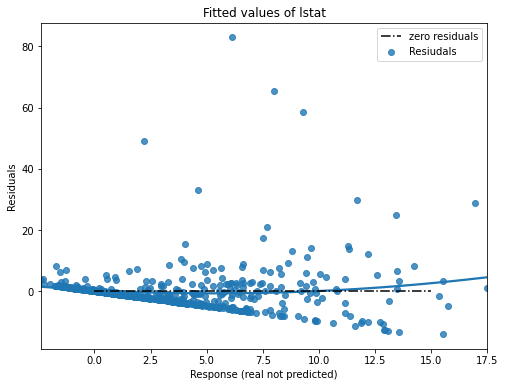

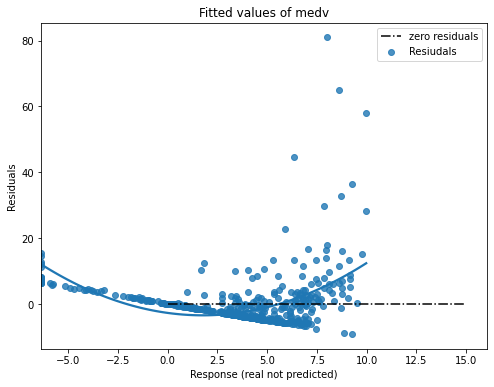

In [23]:
for col in boston.columns:

    plt.figure(figsize=(8,6))
    sns.regplot(x=re[col].fittedvalues, y=re[col].resid,order=2,ci=None,label='Resiudals')
    plt.plot(np.linspace(0,15,10),np.linspace(0,15,10)*0,ls='-.',c='black',label='zero residuals')
    plt.title('Fitted values of ' + col)
    plt.legend()
    plt.xlabel('Response (real not predicted)')
    plt.ylabel('Residuals')
    plt.show()

It can be seen here that the different models are not linear at all, however some prensent some correlation, live medv or isat.

In [51]:
#b 
results = smf.ols('crim ~' + ' + '.join(boston.columns[1:]),data=boston).fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.57e-56
Time:                        09:59:38   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can reject the null hypotesis for: zn,dis, rad, black and medv. The otheres predictors have >0.05 p-values. 
Antoher discovery is that the r2 is considerable low (0.454)

In [97]:
x = [re[col].params[col] for col in boston.columns[1:]]

In [98]:
y= [results.params[col] for col in boston.columns[1:]]

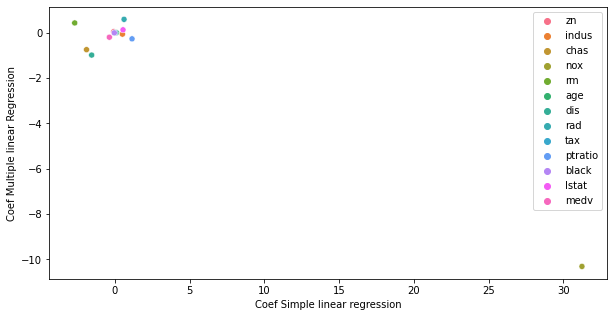

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=x,y=y, hue=boston.columns[1:])
plt.xlabel('Coef Simple linear regression')
plt.ylabel('Coef Multiple linear Regression')
plt.show()

Some parameters changhe the sign when we perform a multiple regression rather than a simple one. This graph is hard to analize with the value of nox (32,-10)


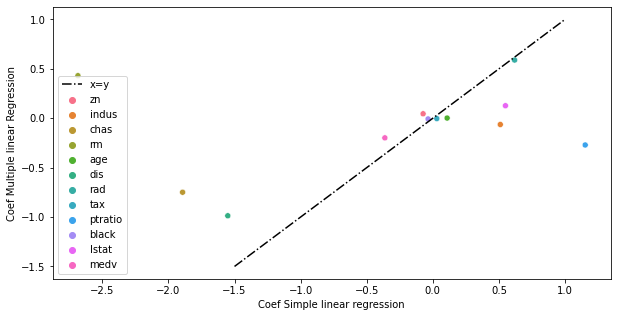

In [128]:
x_1 = x.copy()
y_1 = y.copy()
col = list(boston.columns)
col.remove('nox')
x_1.remove(x_1[3])
y_1.remove(y_1[3])
plt.figure(figsize=(10,5))
sns.scatterplot(x=x_1,y=y_1,hue=col[1:])
plt.plot(np.linspace(-1.5,1,10),np.linspace(-1.5,1,10)*1,ls='-.',c='black',label='x=y')
plt.legend()
plt.xlabel('Coef Simple linear regression')
plt.ylabel('Coef Multiple linear Regression')
plt.show()

There are some cof that are similar in both regression, but othere are not similar at all, they even change the sign.